In [1]:
# Dependencies
import requests
import json

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [2]:
employers = pd.read_csv("Largest_Employers.csv")
employers.head()

,Rank,Company Name,Address,Zipcode,Line of Business,Employees
0,1,Capital One Financial Corp.,"15000 Capital One Dr, Henrico, VA 23238",23238,Financial services,"13,000"
1,2,Virginia Cmnwlth. Univ. Health Syst,"1601 Willow Lawn Dr, Richmond, VA 23230",23230,Health Care,"9,313"
2,3,HCA Virginia Health System,"7101 Jahnke Rd, Richmond, VA 23225",23225,Health Care,"7,628"
3,4,Bon Secours Richmond,"Forest Ave, Richmond, VA 23229",23229,Health Care,"7,136"
4,5,Dominion Virginia Power,"400 Scott Rd, Richmond, VA 23227",23227,Energy,"5,433"


In [3]:
lineofbusn = employers.groupby(['Line of Business'])
busn = lineofbusn['Company Name'].count()
busn.head()

Line of Business
Agribusiness cooperative    1
Amusement park              1
Automotive retail           1
Call center                 1
Chemicals                   2
Name: Company Name, dtype: int64

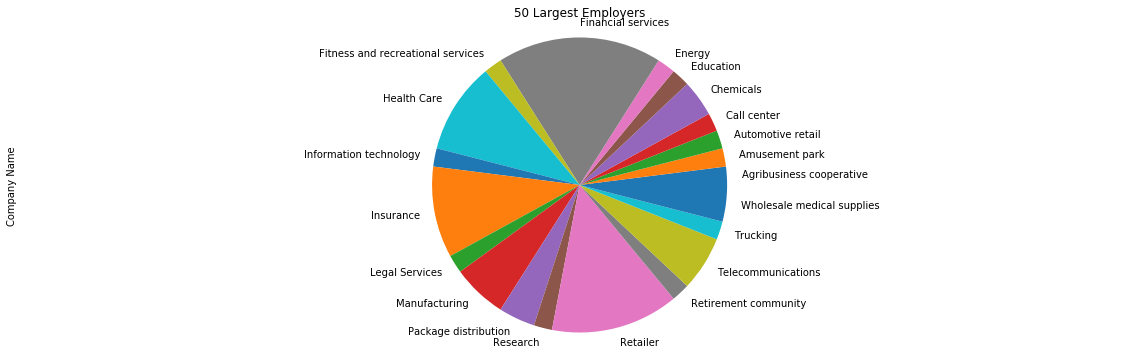

In [75]:
pieplot = busn.plot.pie(figsize=(20,6), subplots=True)
plt.axis("equal")
plt.title("50 Largest Employers", )
plt.savefig("50 Largest Employers.png")

In [76]:
towork = pd.read_csv("TopPlacestoWork.csv")
towork.head()

,Rank,Company Name,Founded,Locations,Employees,Years named,Line of Business
0,1,CarMax Inc.,1993,4,"1,531",6,Automotive retail
1,2,Capital One Financial Corp.,1994,9,"11,400",6,Financial services
2,3,Altria Group Inc.,1902,4,"3,860",5,Manufacturing
3,4,Patient First,1981,10,"1,037",4,Health care
4,1,Long & Foster Richmond Region,1968,16,857,4,Financial services


In [77]:
lineofbusn1 = towork.groupby(['Line of Business'])
busn1 = lineofbusn1['Company Name'].count()
busn1.head()

Line of Business
Advertising and marketing                       1
Architecture                                    1
Automotive retail                               3
Certified public accountants and consultants    1
Commercial general contractor                   1
Name: Company Name, dtype: int64

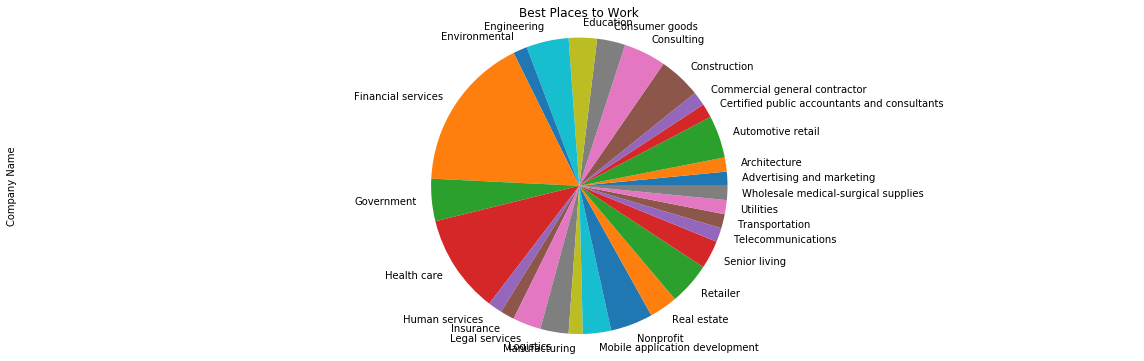

In [78]:
pieplot = busn1.plot.pie(figsize=(20,6), subplots=True)
plt.axis("equal")
plt.title("Best Places to Work")
plt.savefig("Best Places to Work.png")

In [8]:
combined_df = pd.merge(employers,towork,how='outer',on=["Company Name","Company Name"])
combined_df.head()

,Rank_x,Company Name,Address,Zipcode,Line of Business_x,Employees_x,Rank_y,Founded,Locations,Employees_y,Years named,Line of Business_y
0,1.0,Capital One Financial Corp.,"15000 Capital One Dr, Henrico, VA 23238",23238.0,Financial services,"13,000",2.0,1994.0,9.0,"11,400",6.0,Financial services
1,2.0,Virginia Cmnwlth. Univ. Health Syst,"1601 Willow Lawn Dr, Richmond, VA 23230",23230.0,Health Care,"9,313",NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,HCA Virginia Health System,"7101 Jahnke Rd, Richmond, VA 23225",23225.0,Health Care,"7,628",NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Bon Secours Richmond,"Forest Ave, Richmond, VA 23229",23229.0,Health Care,"7,136",NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Dominion Virginia Power,"400 Scott Rd, Richmond, VA 23227",23227.0,Energy,"5,433",NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# combined_df["Employees_y"] = pd.to_numeric(combined_df["Employees_y"], errors = 'coerce')
# combined_df["Employees_x"] = pd.to_numeric(combined_df["Employees_x"], errors = 'coerce')

In [10]:
cols = ['Employees_y','Employees_x']

combined_df[cols] = combined_df[cols].replace({',': ''}, regex = True)
combined_df[cols] = combined_df[cols].apply(pd.to_numeric, axis=1)
combined_df[cols].head()

,Employees_y,Employees_x
0,11400.0,13000.0
1,NaN,9313.0
2,NaN,7628.0
3,NaN,7136.0
4,NaN,5433.0


In [11]:
employees_df = combined_df[cols]
employees_df['bins_y'] = pd.cut(employees_df['Employees_y'], bins = [0, 124, 399, 999, max(employees_df['Employees_y'])])
employees_df['bins_x'] = pd.cut(employees_df['Employees_x'], bins = [0, 124, 399, 999, max(employees_df['Employees_x'])])

employees_df.head()


,Employees_y,Employees_x,bins_y,bins_x
0,11400.0,13000.0,"(999.0, 11400.0]","(999.0, 13000.0]"
1,NaN,9313.0,NaN,"(999.0, 13000.0]"
2,NaN,7628.0,NaN,"(999.0, 13000.0]"
3,NaN,7136.0,NaN,"(999.0, 13000.0]"
4,NaN,5433.0,NaN,"(999.0, 13000.0]"


In [12]:
size1= pd.DataFrame(employees_df.groupby('bins_y').count()['Employees_y'])
size2= pd.DataFrame(employees_df.groupby('bins_x').count()['Employees_x'])
size2

,Employees_x
bins_x,
"(0.0, 124.0]",0
"(124.0, 399.0]",0
"(399.0, 999.0]",26
"(999.0, 13000.0]",24


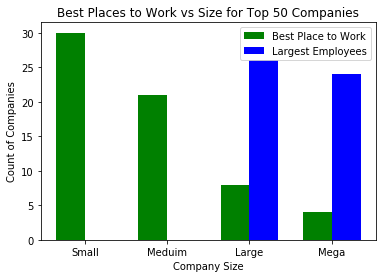

In [56]:
labels = ['Small', 'Meduim', 'Large', 'Mega']

x = np.arange(4)  # the label locations
width = 0.35  # the width of the bars


plt.bar(x, size1['Employees_y'], width, color='green', label='Best Place to Work')
plt.bar(x+width, size2['Employees_x'], width, color='blue', label='Largest Employees')
plt.title('Best Places to Work vs Size for Top 50 Companies')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Count of Companies')
plt.xlabel('Company Size')
plt.xticks(x+ width/2, labels)

plt.legend(loc='best')
plt.savefig("50 Largest Employers.png")
plt.show()

In [57]:
women = pd.read_csv("Master List-Employee Above 5-MSA Regions.csv")
# women.columns.tolist()
women.head()

,Index,In GRP,Locality,Business Name,GRP Cluster,Main Line of Business,Physical Address,Physical Address Number,Physical Pre Direction,Physical Address Name,...,Est. Accounting Annual Expense,Est. Advertising Annual Expense,Est. Business Insurance Annual Expense,Est. Legal Annual Expense,Est. Office Equipment Annual Expense,Est. Rent Annual Expense,Est. Technology Annual Expense,Est. Telecom Annual Expense,Est. Utilities Annual Expense,BusinessID
0,1.0,Not,Caroline,M.C.Dean Inc-Prefabrication Facility,NaN,Electric Companies,22433 Bills Way,22433,NaN,Bills,...,"$100,000 or more","$5,000 to $14,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more",1.114001e+13
1,2.0,Not,Caroline,Nuambition LLC,NaN,Catalog & Mail-Order Houses,18414 Congressional Cir,18414,NaN,Congressio,...,"$25,000 to $99,999","$100,000 or more","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$25,000 to $99,999","$100,000 or more",1.114001e+13
2,3.0,Not,Caroline,McKesson,Supply Chain Management,Pharmaceutical Products Wholesale,10504 Mckesson Dr,10504,NaN,McKesson,...,"$100,000 or more","$25,000 to $99,999","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more","$100,000 or more",1.113256e+13
3,4.0,Not,Caroline,Pilot Flying J,NaN,Truck Stops & Plazas,24279 Rogers Clark Blvd,24279,NaN,Rogers Cla,...,"$25,000 to $99,999","$25,000 to $99,999","$50,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$100,000 or more","$100,000 or more","$10,000 to $24,999","$100,000 or more",1.113255e+13
4,5.0,Not,Caroline,Atlas Pallet Division,Supply Chain Management,Pallets & Skids Wholesale,29155 Richmond Tpke,29155,NaN,Richmond,...,"$25,000 to $99,999","$5,000 to $14,999","$50,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$25,000 to $99,999","$50,000 to $99,999",1.113255e+13


In [58]:
lineofbusn2 = women.groupby(['Main Line of Business'])
busn2 = lineofbusn2['Women Owned'].count()
busn2.head()

Main Line of Business
Accident & Health Insurance Carriers             1
Accountants & Accounting Services              114
Accounting, Auditing & Bookkeeping Services     69
Acoustical Contractors                           2
Acupuncturists                                   1
Name: Women Owned, dtype: int64

In [59]:
womenowned_df = women[['Women Owned', 'Business Name', 'Main Line of Business', '2017 Revenue/Yr']]
womenowned_df.head()

,Women Owned,Business Name,Main Line of Business,2017 Revenue/Yr
0,No,M.C.Dean Inc-Prefabrication Facility,Electric Companies,108029356.0
1,No,Nuambition LLC,Catalog & Mail-Order Houses,107883840.0
2,No,McKesson,Pharmaceutical Products Wholesale,59340843.0
3,No,Pilot Flying J,Truck Stops & Plazas,56740481.0
4,No,Atlas Pallet Division,Pallets & Skids Wholesale,33410993.0


In [60]:
womenownedgroupby = womenowned_df.groupby(['Women Owned'])
womenownedgroupby.count()

,Business Name,Main Line of Business,2017 Revenue/Yr
Women Owned,,,
No,22688,22688,22688
Yes,912,912,912


In [ ]:
womenownedgroupby = 

In [61]:
womenonly = womenowned_df[womenowned_df['Women Owned']=="Yes"]
womenonly.head()

,Women Owned,Business Name,Main Line of Business,2017 Revenue/Yr
17,Yes,Fixture Specialist Inc,"Plumbing, Heating, & Air Conditioning Contractors",8390928.0
31,Yes,Robinson Construction,Residential Building Construction,4869735.0
38,Yes,Ladysmith Heating & Air Cond,"Plumbing, Heating, & Air Conditioning Contractors",3872736.0
56,Yes,Arby's,Restaurants,2009366.0
66,Yes,Simply Stashing,Beddings & Linens Stores,1800361.0


In [85]:
lineofbusn3 = womenonly.groupby(['Main Line of Business'])
busn3 = lineofbusn3['2017 Revenue/Yr'].sum()
womenbusn= pd.DataFrame(busn3)
womenbusn.head()

,2017 Revenue/Yr
Main Line of Business,
Accountants & Accounting Services,2923761.0
"Accounting, Auditing & Bookkeeping Services",3143043.0
Adjustment & Collection Services,2153249.0
Adult Day Care Centers,1616522.0
Advertising Agencies,16762838.0


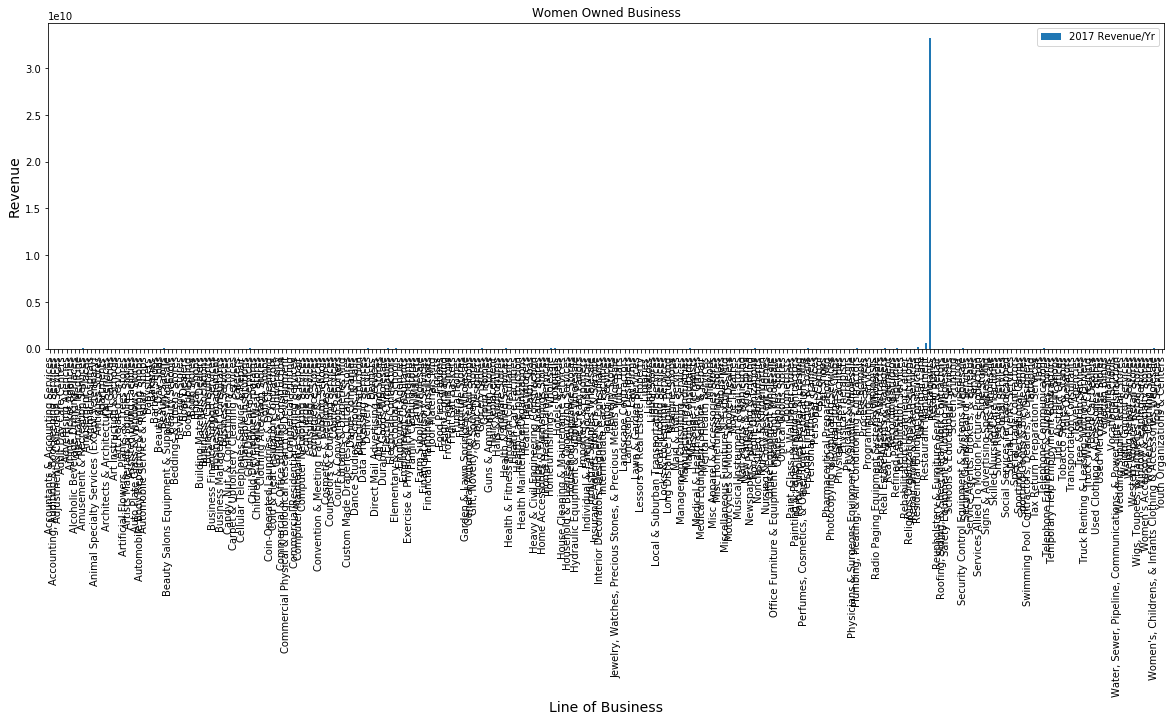

In [92]:
womenbusn.plot(kind="bar", figsize=(20,6))
plt.xlabel('Line of Business', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title("Women Owned Business")
plt.savefig("Women Owned Business")

In [93]:
menonly = womenowned_df[womenowned_df['Women Owned']=="No"]
menonly.head()

,Women Owned,Business Name,Main Line of Business,2017 Revenue/Yr
0,No,M.C.Dean Inc-Prefabrication Facility,Electric Companies,108029356.0
1,No,Nuambition LLC,Catalog & Mail-Order Houses,107883840.0
2,No,McKesson,Pharmaceutical Products Wholesale,59340843.0
3,No,Pilot Flying J,Truck Stops & Plazas,56740481.0
4,No,Atlas Pallet Division,Pallets & Skids Wholesale,33410993.0


In [94]:
lineofbusn4 = menonly.groupby(['Main Line of Business'])
busn4 = lineofbusn4['2017 Revenue/Yr'].sum()
menbusn= pd.DataFrame(busn4)
menbusn.head()

,2017 Revenue/Yr
Main Line of Business,
Accident & Health Insurance Carriers,7588718.0
Accountants & Accounting Services,135388943.0
"Accounting, Auditing & Bookkeeping Services",368247812.0
Acoustical Contractors,4610400.0
Acupuncturists,235323.0


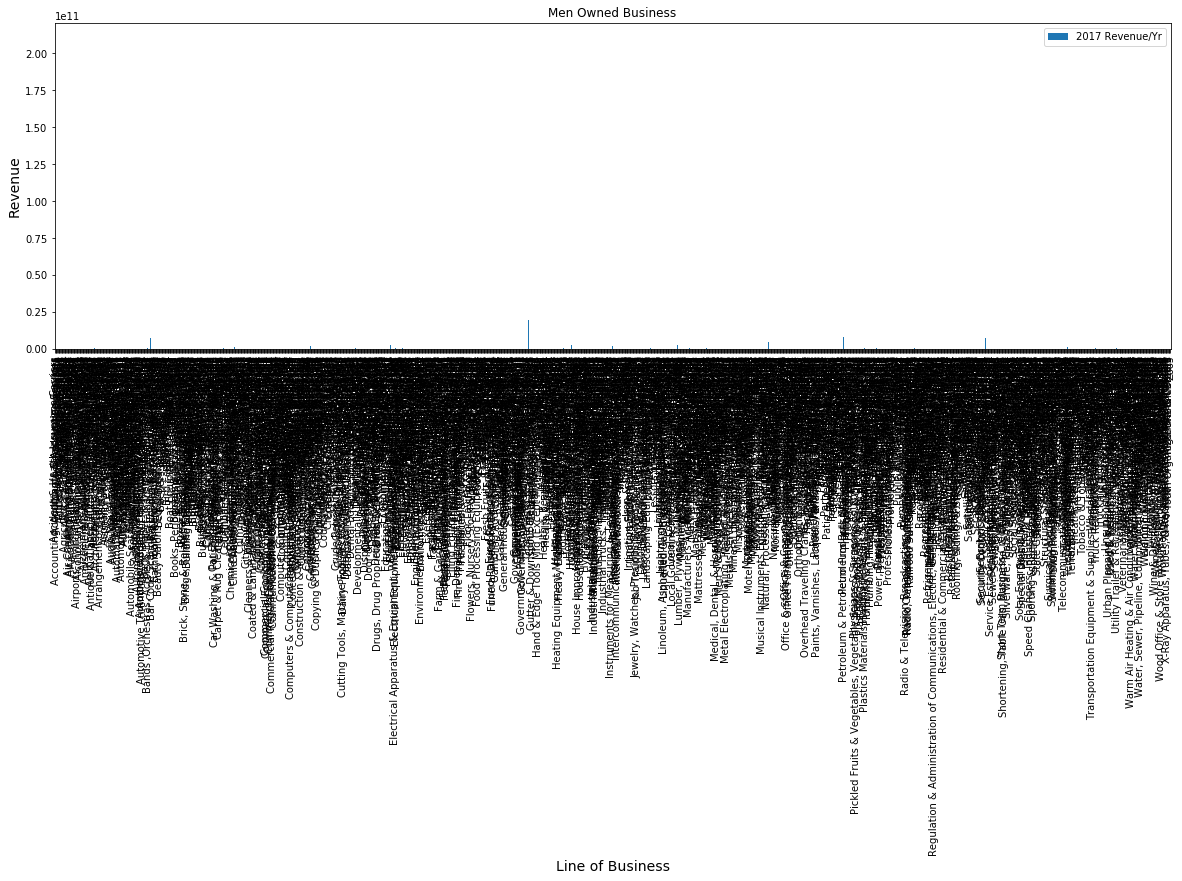

In [95]:
menbusn.plot(kind="bar", figsize=(20,6))
plt.xlabel('Line of Business', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title("Men Owned Business")
plt.savefig("Men Owned Business")